In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("daily-total-female-births-CA.csv", parse_dates = ['date'])
df

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   births  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


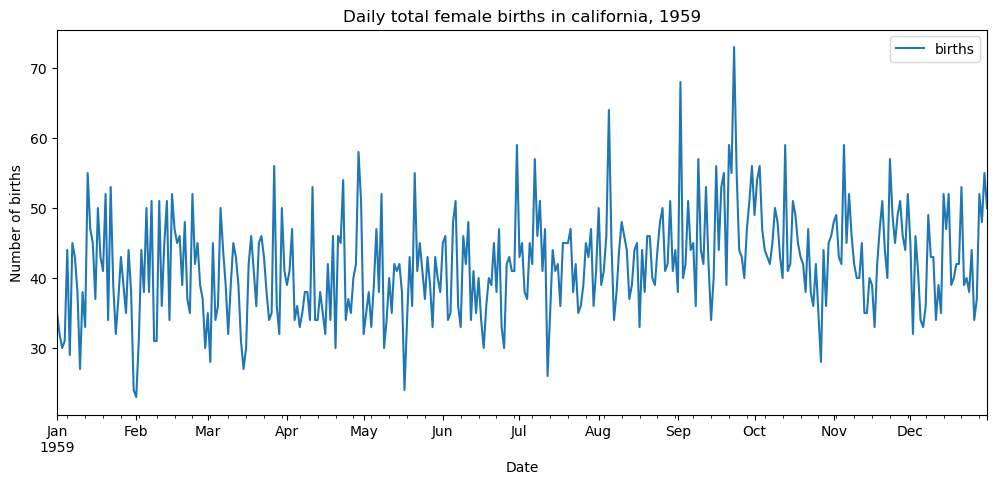

In [5]:
df.plot(y='births', x='date', figsize=(12, 5), title="Daily total female births in california, 1959", 
        xlabel='Date', ylabel='Number of births')
plt.show()

From the plot, we can see that the time series data is not Stationary. There is an increasing trend up to late of September, then a decrease afterwards.

In [6]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

In [7]:
acorr_ljungbox(df['births'], lags=int(round(np.log(len(df['births'])),0)))

,lb_stat,lb_pvalue
1,17.367682,3.080192e-05
2,25.992300,2.269048e-06
3,30.325469,1.178756e-06
4,33.375391,1.000684e-06
5,36.801412,6.564334e-07
6,39.894057,4.778802e-07


Let's now remove the trend and make the time series Stationary using differencing.

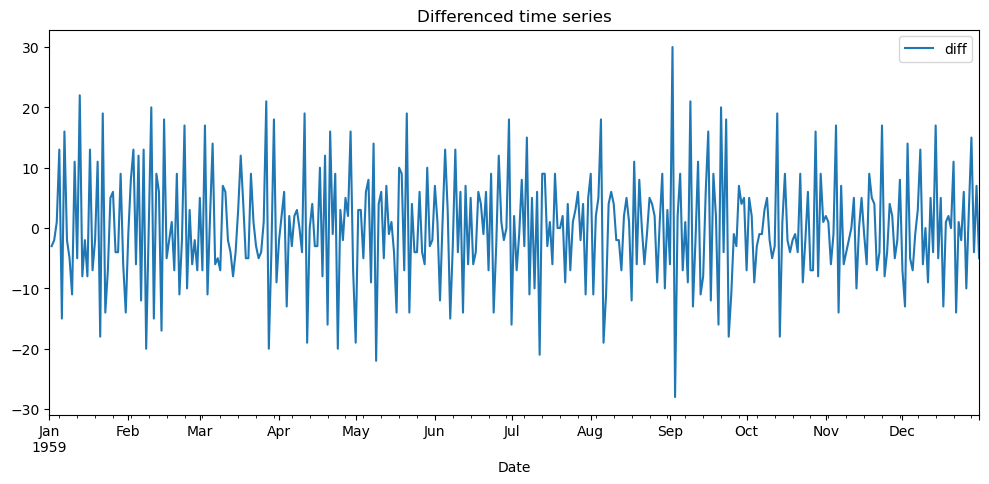

In [10]:
df['diff'] = df['births'].diff(1)
df.plot(y='diff', x='date', figsize=(12, 5), title="Differenced time series", 
          xlabel='Date')
plt.show()

In [11]:
# run Ljung-Box test again on the differenced time series.
acorr_ljungbox(df['diff'][1:], lags=int(round(np.log(len(df['diff'])-1),0)))

,lb_stat,lb_pvalue
1,78.542717,7.828694e-19
2,78.589527,8.600050e-18
3,78.712174,5.797565e-17
4,78.734426,3.228981e-16
5,78.740091,1.539424e-15
6,80.502919,2.812659e-15
